# DS 3000 - Assignment 4

**Student Name**: Haoyuan Deng

**Date**: 1/30/25


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: 

Load the data directly from the url into a dataframe.


In [268]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://drive.google.com/uc?export=download&id=1aWQsq0fdL3SF-jyrVMpEAtHW9FFSF2xO'
# Load the data into a dataframe
substance_df = pd.read_csv(url)

print(substance_df.head())

   Year County of Program Location Program Category  \
0  2007                     Albany           Crisis   
1  2007                     Albany           Crisis   
2  2007                     Albany           Crisis   
3  2007                     Albany           Crisis   
4  2007                     Albany           Crisis   

                     Service Type      Age Group Primary Substance Group  \
0  Medical Managed Detoxification       Under 18                  Heroin   
1  Medical Managed Detoxification  18 through 24              All Others   
2  Medical Managed Detoxification  18 through 24           Other Opioids   
3  Medical Managed Detoxification  18 through 24                  Heroin   
4  Medical Managed Detoxification  18 through 24                 Alcohol   

   Admissions  
0           4  
1           2  
2           6  
3         132  
4          35  


## Question 2: 
Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types (if needed) and perform at least one additional data preparation step. 


In [269]:
# Check current data type for each column
print(substance_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99367 entries, 0 to 99366
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Year                        99367 non-null  int64 
 1   County of Program Location  99367 non-null  object
 2   Program Category            99367 non-null  object
 3   Service Type                99367 non-null  object
 4   Age Group                   99367 non-null  object
 5   Primary Substance Group     99366 non-null  object
 6   Admissions                  99367 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 5.3+ MB
None


In [270]:
# Convert categorical fields
category_col = ['Program Category', 'Service Type', 'Age Group', ]
substance_df[category_col] = substance_df[category_col].astype('category')

# Remove none values from each column
print(substance_df.dropna())


       Year County of Program Location Program Category  \
0      2007                     Albany           Crisis   
1      2007                     Albany           Crisis   
2      2007                     Albany           Crisis   
3      2007                     Albany           Crisis   
4      2007                     Albany           Crisis   
...     ...                        ...              ...   
99362  2021                      Yates       Outpatient   
99363  2021                      Yates       Outpatient   
99364  2021                      Yates       Outpatient   
99365  2021                      Yates       Outpatient   
99366  2021                      Yates       Outpatient   

                         Service Type      Age Group Primary Substance Group  \
0      Medical Managed Detoxification       Under 18                  Heroin   
1      Medical Managed Detoxification  18 through 24              All Others   
2      Medical Managed Detoxification  18 through 2

## Question 3: 
Visualize the distribution of Age Groups, Program Category, Primary Substance Group, and Admissions. Ensure that you 1) choose an appropriate graph based on the type of data, and 2) use the appropriate function to aggregate the data. Explain each chart.


Age Groups:

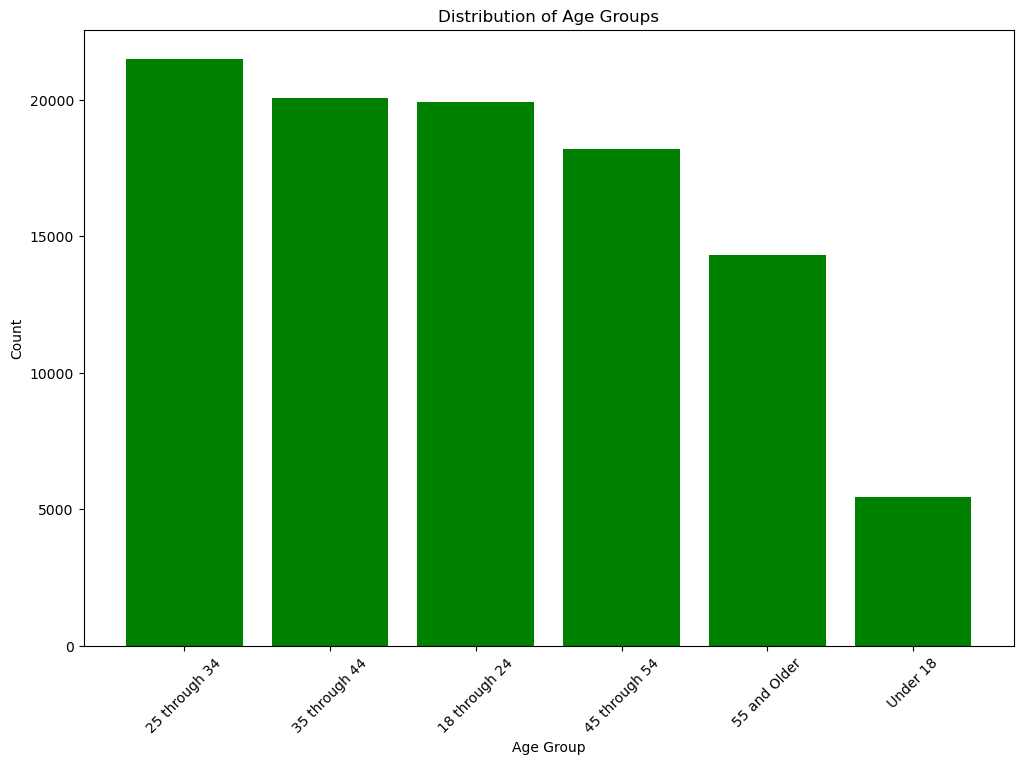

In [271]:
# Count occurrences of each Age Group
age_group_counts = substance_df["Age Group"].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.bar(age_group_counts.index, age_group_counts.values, color='green')

# Add labels and title
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Distribution of Age Groups")
plt.xticks(rotation=45)

# Show plot
plt.show()


This bar chart shows the age group distribution from the dataset where most substance use user are aged from 25 through 25 and less users aged under 18.

Program Category:

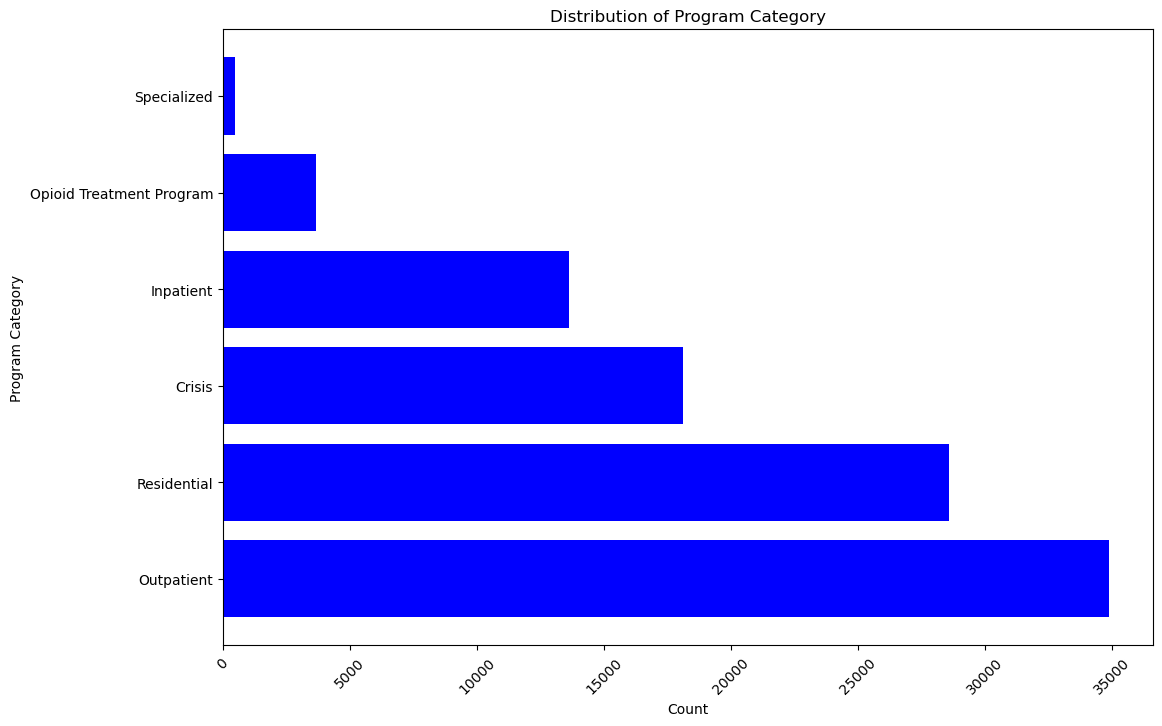

In [272]:
# Count occurrences of each Program Category
program_counts = substance_df["Program Category"].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.barh(program_counts.index, program_counts.values, color='blue')

# Add labels and title
plt.xlabel("Count")
plt.ylabel("Program Category")
plt.title("Distribution of Program Category")
plt.xticks(rotation=45)

# Show plot
plt.show()



This horizontal bar chart describe the distribution of program category where outpatient has the most count; whereas, specilized has the least.

Primary Substance Group: 

/var/folders/sw/4xrc7st92kl0js_sn1vflh100000gn/T/ipykernel_25647/747191700.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Primary Substance Group", data=substance_df, palette="Set1")


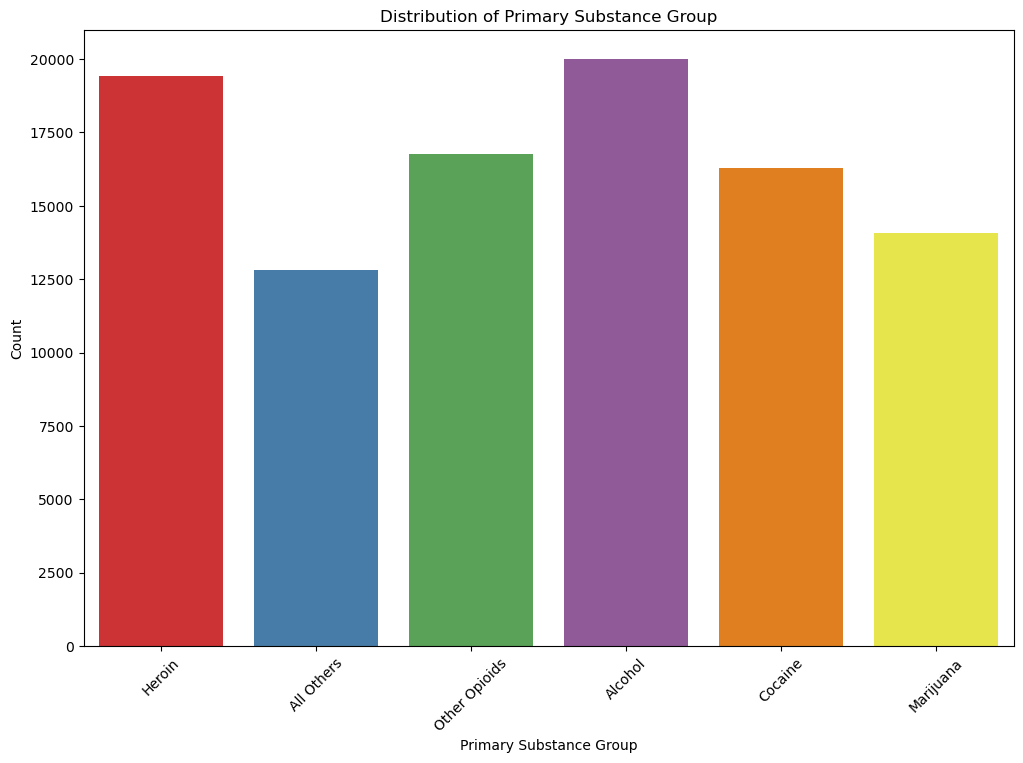

In [273]:
# Create a countplot to visualize Primary Substance Group
plt.figure(figsize=(12, 8))
sns.countplot(x="Primary Substance Group", data=substance_df, palette="Set1")

# Add labels and title
plt.xlabel("Primary Substance Group")
plt.ylabel("Count")
plt.title("Distribution of Primary Substance Group")
plt.xticks(rotation=45)

# Show plot
plt.show()


The countplot shows the distribution of primary substance group where heroin has the most counts and all others has the least.

Admission:

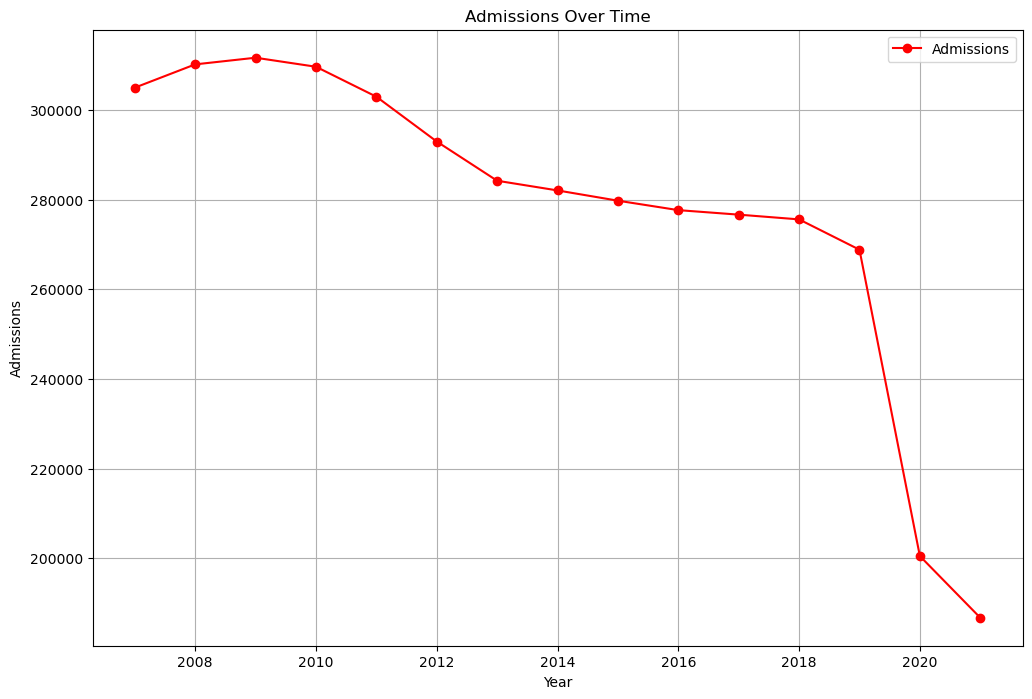

In [274]:
# Aggregate admissions by year
admissions_by_year = substance_df.groupby('Year')['Admissions'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(admissions_by_year['Year'], admissions_by_year['Admissions'], marker='o', linestyle='-', color='r', label='Admissions')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Admissions')
plt.title('Admissions Over Time')
plt.grid(True)
plt.legend()

# Show plot
plt.show()

This line plot shows that overal trend of the total admissions over the years, where year 2009 is the peak fo total admission and the line keeps descending overtime to it the lowest at year 2021 for total admissions.

## Question 4: 
Develop a function named annualAdmissions(). This function will calculate the total reported admissions each year across the entire state of New York. Subsequently, display the results using a line chart and annotate the chart to indicate the year with the highest number of admissions.
After which, Execute the function in a new cell. Explain the chart and discuss any patterns or trends that you have observed.


In [275]:
def annualAdmissions(df):
    '''
    Group by 'Year' and sum the 'Admissions' to get total admissions per year
    Parameter: df (substance_df)
    Return: Line Plot showing the totol admissions over time and the maximum total admission
    '''
    
    # Group by 'Year' and sum the 'Admissions' to get total admissions per year
    admissions_by_year = df.groupby('Year')['Admissions'].sum().reset_index()

    # Identify the year with the highest number of admissions
    max_admissions_year = admissions_by_year.loc[admissions_by_year['Admissions'].idxmax()]

    # Plotting the line chart
    plt.figure(figsize=(12, 8))
    plt.plot(admissions_by_year['Year'], admissions_by_year['Admissions'], marker='o', linestyle='-', color='b', label='Total Admissions')
   
    # Add a red dot **on top** of the blue dot at the maximum point
    plt.scatter(max_admissions_year['Year'], max_admissions_year['Admissions'], color='r', edgecolor='black', s=100, zorder=3, label='Max Point')

    # Adding labels and title
    plt.xlabel('Year')
    plt.ylabel('Total Admissions')
    plt.title('Annual Total Admissions in New York')
    plt.grid(True)
    plt.legend()
    
    # Show plot
    plt.show()

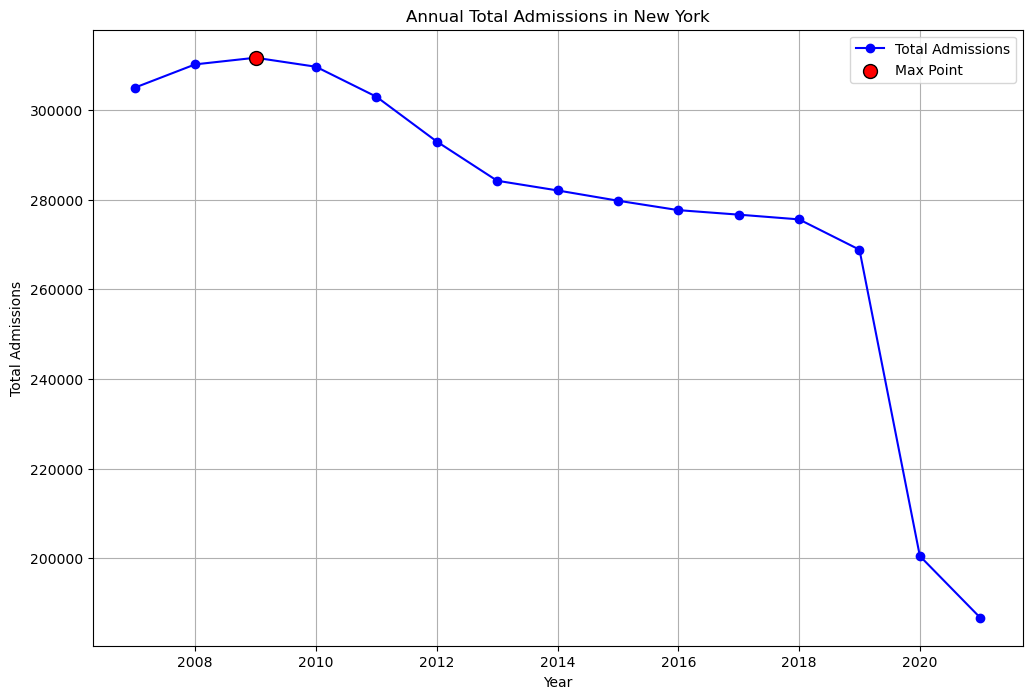

In [276]:
annualAdmissions(substance_df)

The annual total admissions in New York line chart displays the overall trend of the total admissions over the years. Based on the chart, it shows a downward trajectory where the total admissions value decrease the year goes by, reaching the lowesting in the 2021. The peak of the total admission is located in 2009 where it has the highest total admission value amoung all the years.  

## Question 5: 
Develop a function named annualAdmissionsByCounty(year). This function will take a year as input, filter the data to identify all admissions for that specific year, and calculate the proportion of admissions by county. For instance, if the year is 2007, the function should filter the data for the specific year and compute the admissions as follows: county A 75%, county B 20%, and county C 2.5%, etc. The results should be displayed using a bar chart that highlights the top 10 counties.
Execute the annualAdmissionsByCounty() function in a new code cell to visualize the data for the last 10 years within the data.
Analyze the results and discuss any patterns or trends observed over this period.


In [277]:
def annualAdmissionsByCounty(year):
    '''
    Produce the proportion of admissions bar chart within each county for the given year 
    Parameter: year
    Return: bar chart 
    '''

    # Filter the dataset for the specified year
    year_df = substance_df[substance_df['Year'] == year]

    # Group admissions by county
    county_admissions = year_df.groupby('County of Program Location')['Admissions'].sum()

    # Calculate proportions and get the top 10 counties admissions proportion
    portion = (county_admissions / county_admissions.sum()) * 100
    top_10 = portion.nlargest(10)

    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    top_10.plot(kind='bar', color='blue')
    plt.xlabel('County')
    plt.ylabel('Percentage of Admissions %')
    plt.title(f'Top 10 Counties by Admissions Proportion in {year}')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='-')

    # Show the plot
    plt.show()

Admissions Distribution for 2012


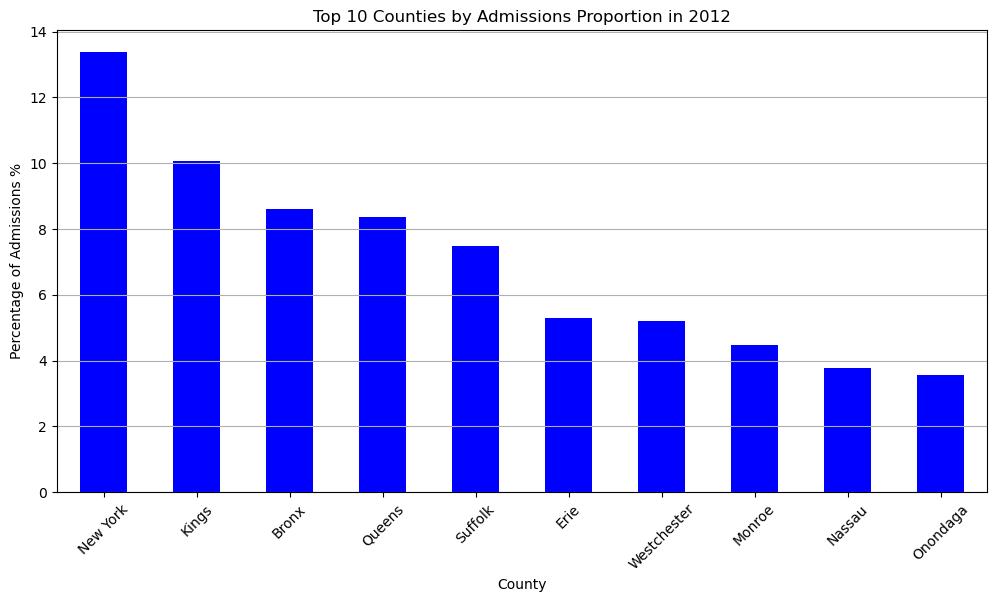

Admissions Distribution for 2013


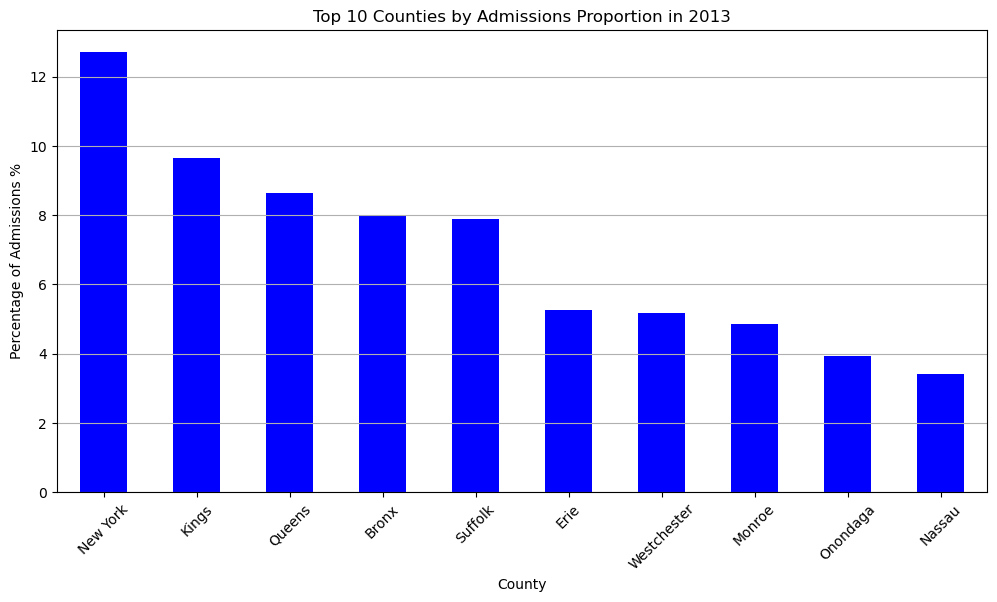

Admissions Distribution for 2014


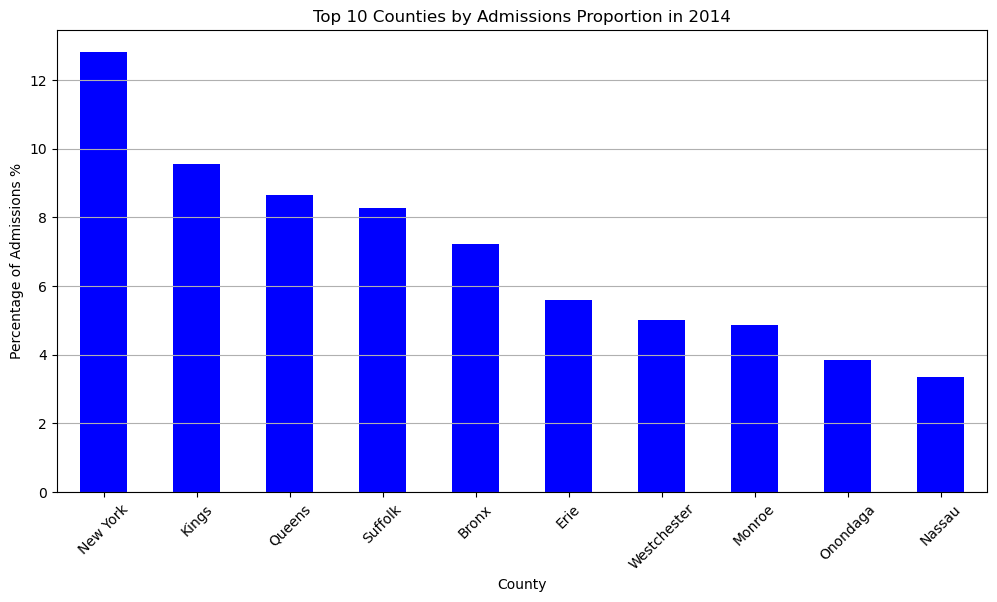

Admissions Distribution for 2015


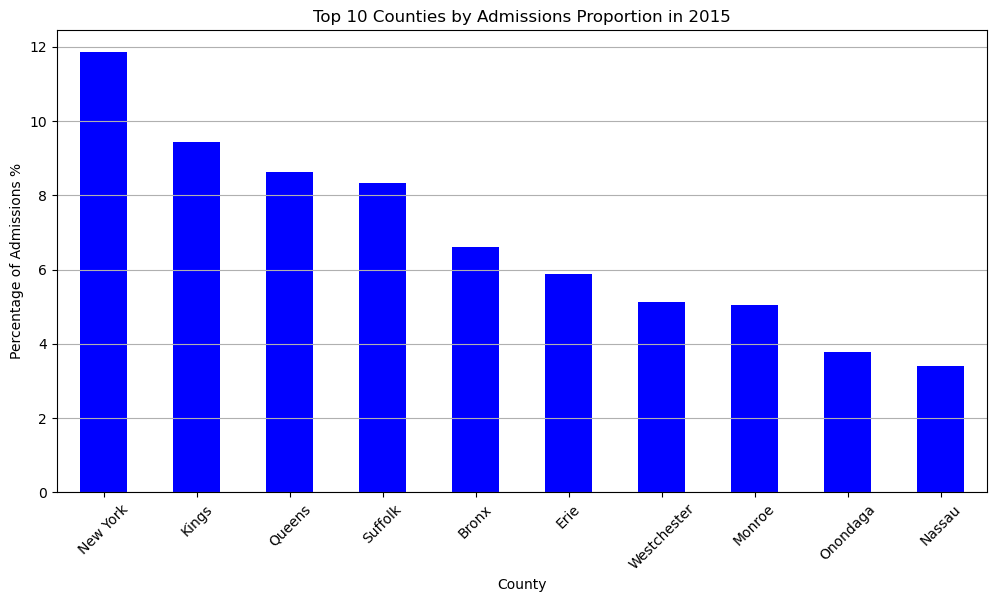

Admissions Distribution for 2016


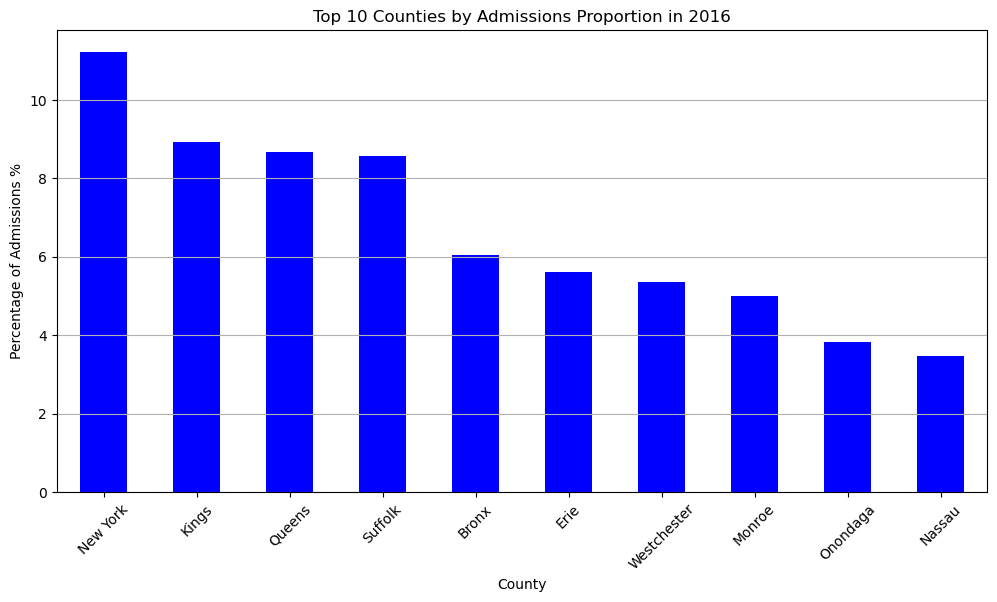

Admissions Distribution for 2017


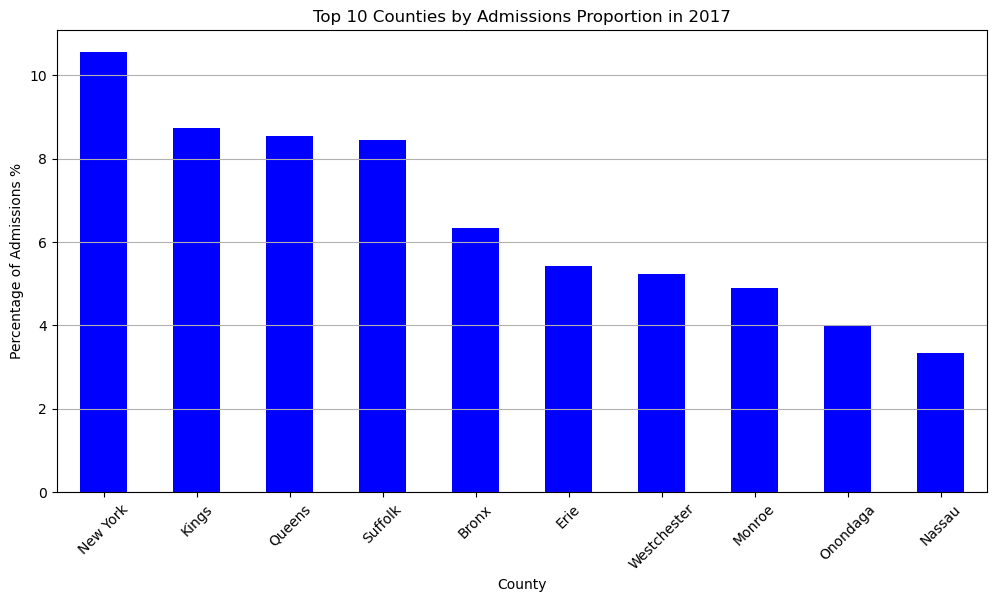

Admissions Distribution for 2018


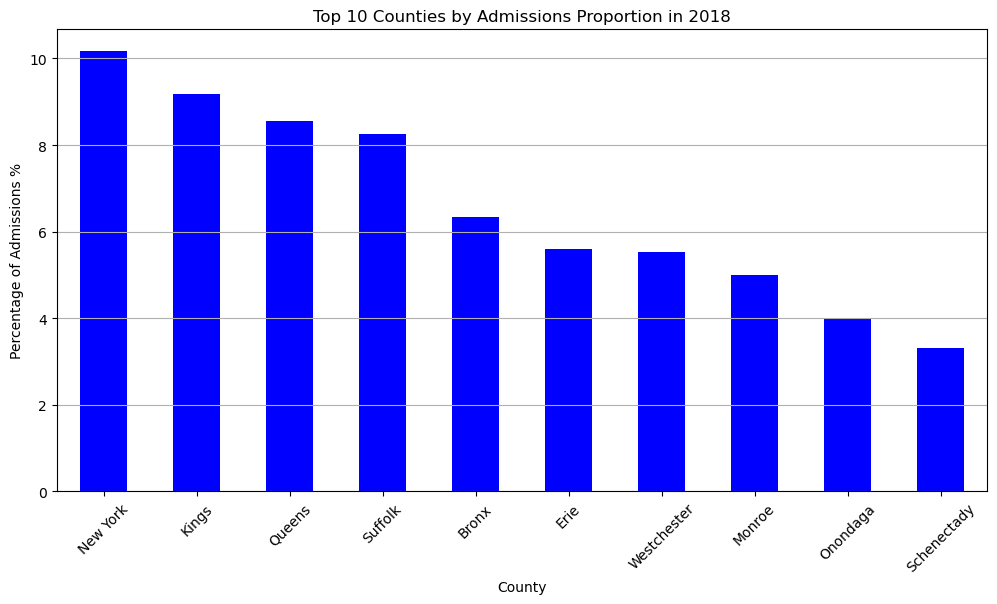

Admissions Distribution for 2019


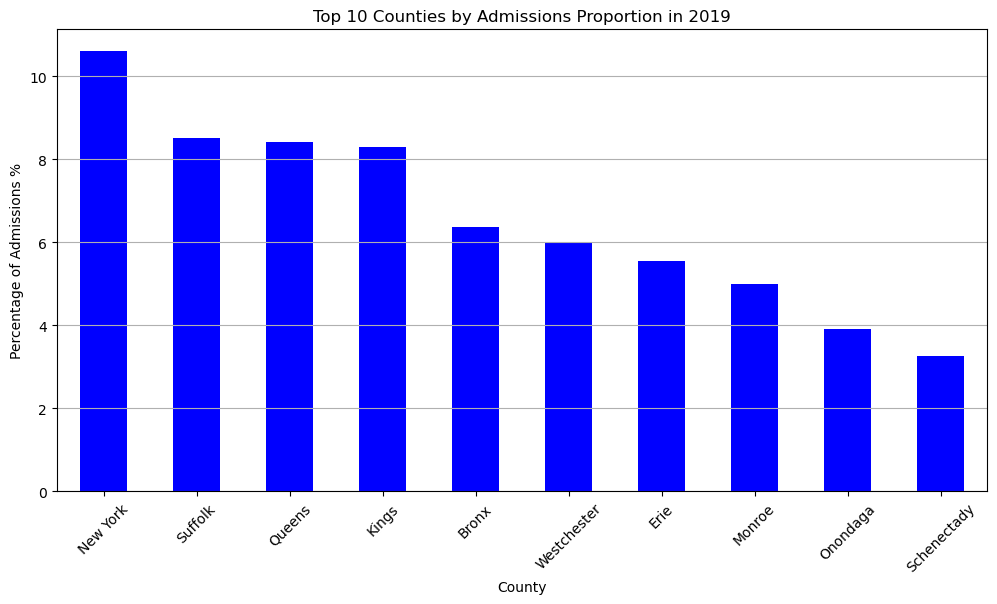

Admissions Distribution for 2020


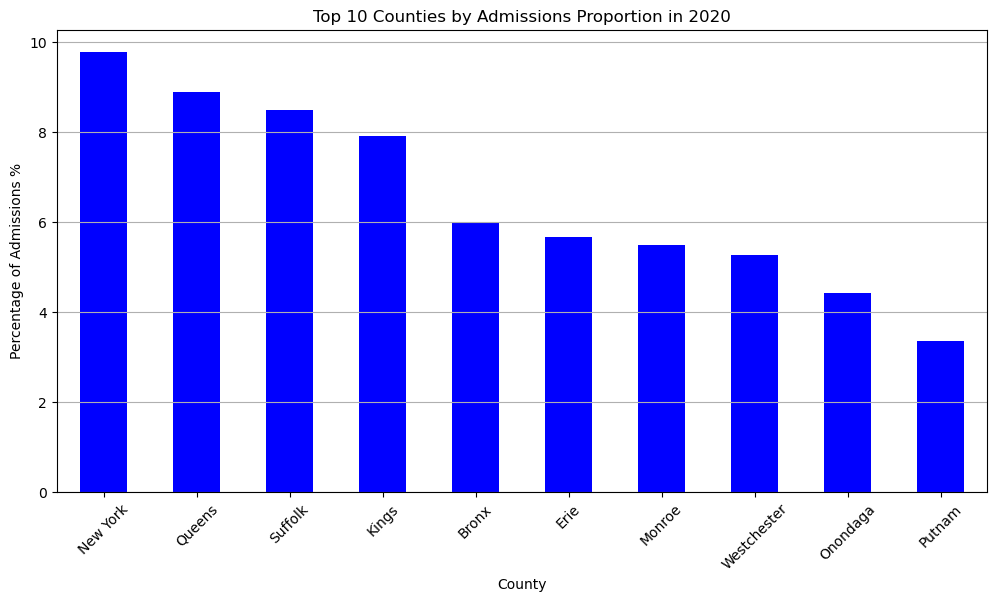

Admissions Distribution for 2021


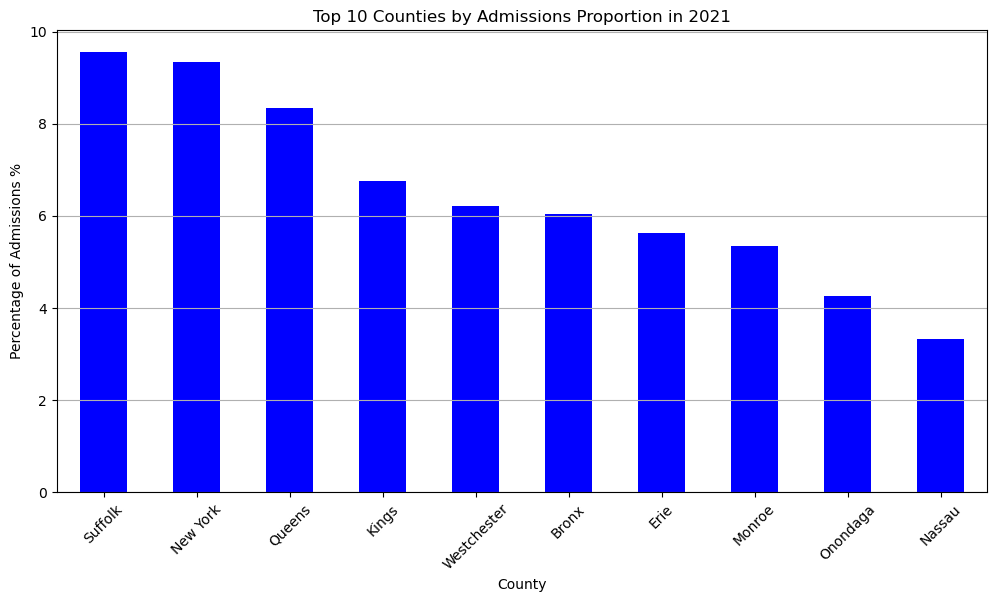

In [278]:
# top 10 county admission portion for the last 10 years from the dataset
for year in range(2012, 2022):
    print(f"Admissions Distribution for {year}")
    annualAdmissionsByCounty(year)

Based on the 10 bar charts showing county admission proportions, New York had the largest portion of admissions for most years from 2012 to 2020. However, Suffolk, which initially ranked fifth in 2012, steadily increased its share each year and surpassed New York to become the top county in 2021.

## Question 6: 
Filter the data, and extract all admissions to the various “Rehab” facilities; i.e. you should perform a case-insensitive match for all facilities that include the word rehab, rehabilitation, etc. Using the filtered data, identify which substance is the most prominent among each age group. Visualize and explain the results.


/var/folders/sw/4xrc7st92kl0js_sn1vflh100000gn/T/ipykernel_25647/3639056686.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = rehab_df.groupby(['Primary Substance Group', 'Age Group'])['Admissions'].sum().reset_index()
/var/folders/sw/4xrc7st92kl0js_sn1vflh100000gn/T/ipykernel_25647/3639056686.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prominent_substance = grouped_df.loc[grouped_df.groupby('Age Group')['Admissions'].idxmax()]


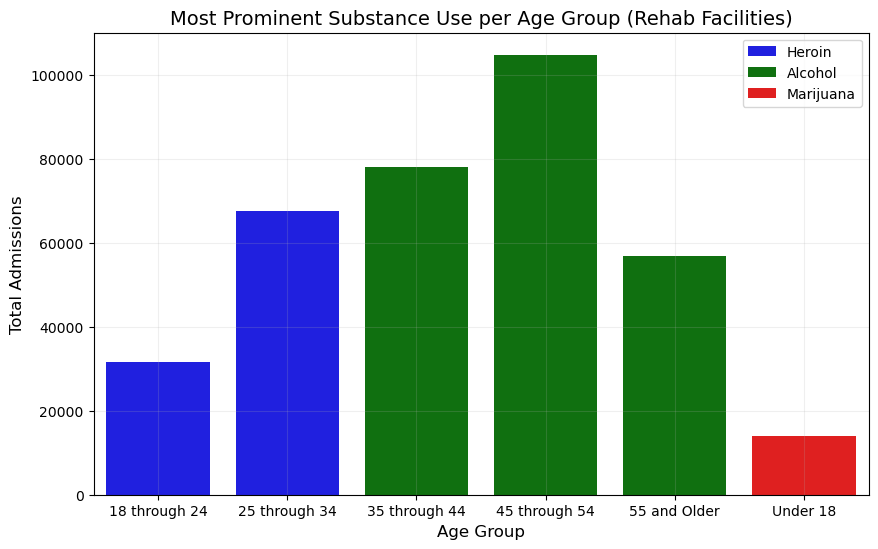

In [279]:
# FIlter the subtance_df only showing reb service type
rehab_df = substance_df[substance_df['Service Type'].str.contains('rehab|rehabilitation', case=False)]

# Group rehab_df by "Age Group" and "Primary Substance Group" to find total admission for each group
grouped_df = rehab_df.groupby(['Primary Substance Group', 'Age Group'])['Admissions'].sum().reset_index()

# Filter by age group and admissions and find the top substance used for each age group 
prominent_substance = grouped_df.loc[grouped_df.groupby('Age Group')['Admissions'].idxmax()]

# Assign color for each substance group
substance_colors = {'Heroin': 'blue', 
                    'Alcohol': 'green',
                    'Marijuana': 'red'}

# Plot the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group',
            y='Admissions', 
            data=prominent_substance,
            hue='Primary Substance Group', 
            palette=substance_colors)

# Customize the plot
plt.title('Most Prominent Substance Use per Age Group (Rehab Facilities)', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Admissions', fontsize=12)
plt.grid(True, linestyle='-', alpha=0.2)
plt.legend()

# Show the plot
plt.show()


The chart indicates that the most prominent substances used across different age groups are heroin, alcohol, and marijuana. It appears that people aged 18 to 34 use heroin the most, the with the highest numbe rof admissions observed in the 25 through 34 age group; while individuals in the 35 to 54 age group tend to use alcohol the most, with the highest number of admissions observed in the 45 through 54 age group. Finally, people under 18 predominantly use marijuana.



 ## Question 7: 
Using the filtered “rehab” data from Question 6, conduct a detailed analysis to identify patterns in admissions to rehabilitation facilities across 7 counties. For example, are admissions for certain substance groups more prevalent etc. Provide a comprehensive explanation of your observations with supporting visualizations.


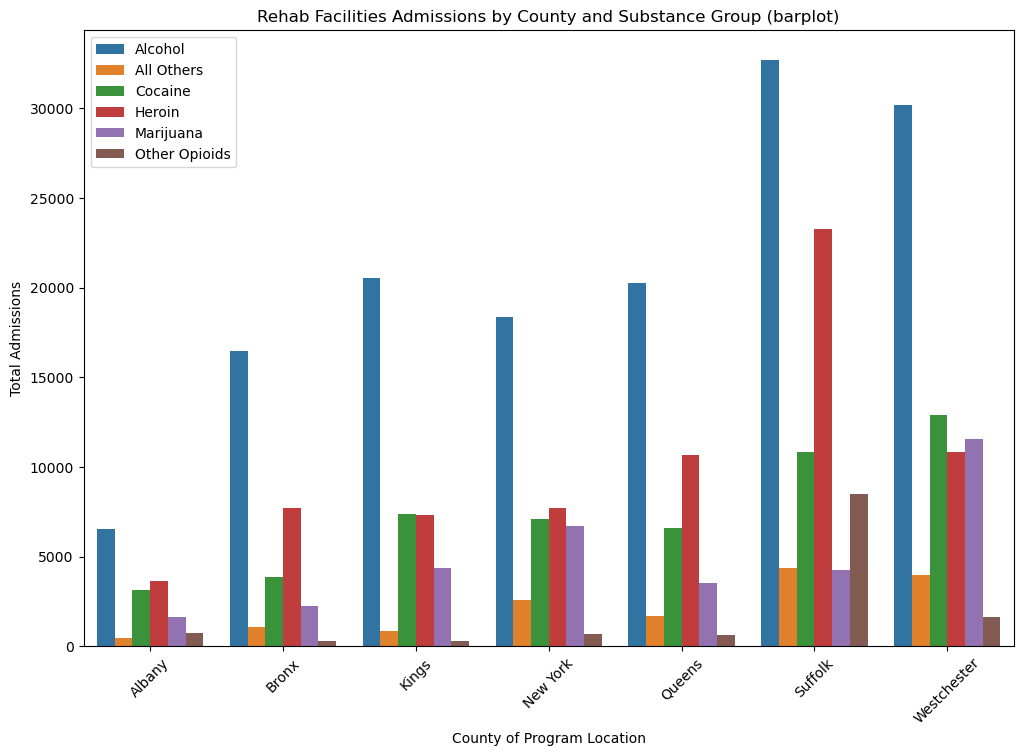

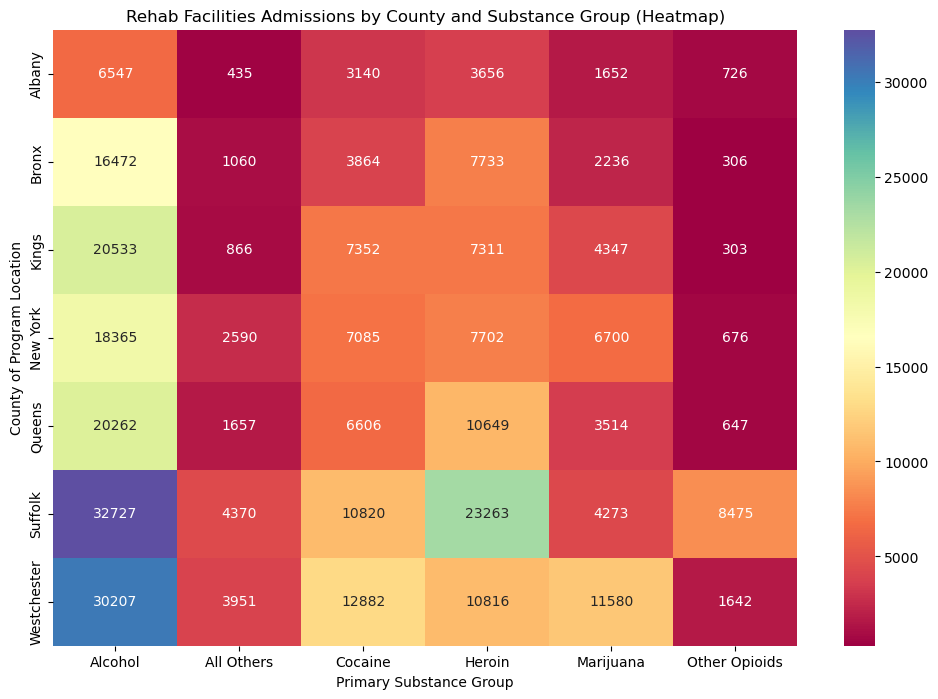

In [ ]:
# List of 7 counties
counties = ['Albany', 'Bronx', 'Kings', 'New York', 'Queens', 'Suffolk', 'Westchester']

# Filter the data to include only the 7 counties data
rehab_df = rehab_df[rehab_df['County of Program Location'].isin(counties)]

# Group by 'County of Program Location' and 'Primary Substance Group' along with total admissions
county_substance_group = rehab_df.groupby(['County of Program Location', 'Primary Substance Group'])['Admissions'].sum().reset_index()

# Bar Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='County of Program Location', y='Admissions', hue='Primary Substance Group', data=county_substance_group)
plt.title('Rehab Facilities Admissions by County and Substance Group (barplot)')
plt.xlabel('County of Program Location')
plt.ylabel('Total Admissions')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Change the dataframe to suitable format for heatmap
heatmap_data = county_substance_group.pivot(index='County of Program Location', columns='Primary Substance Group', values='Admissions')

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Spectral")
plt.title('Rehab Facilities Admissions by County and Substance Group (Heatmap)')
plt.xlabel('Primary Substance Group')
plt.ylabel('County of Program Location')
plt.show()

Based on the plots, the data indicates the total admissions for different substance types within the seven selected counties. Alcohol, Cocaine, and Heroin are the top three substances with the highest admissions across all counties, with the exception of Westchester. Suffolk and Westchester have the highest Alcohol and Heroin admissions, while Westchester also has the highest Cocaine and Marijuana admissions.

Additionally, when analyzing both plots, we can observe the counties with the highest and lowest total substance admissions. "Other Opioids" has the lowest admissions in Kings (303), while Albany has the lowest total admissions for all other substances among the selected counties.

## Question 8: 
[optional/bonus] Create any (1) visualization of your choice to demonstrate something interesting about the data. Ensure that you explain what you will demonstrate and the results.


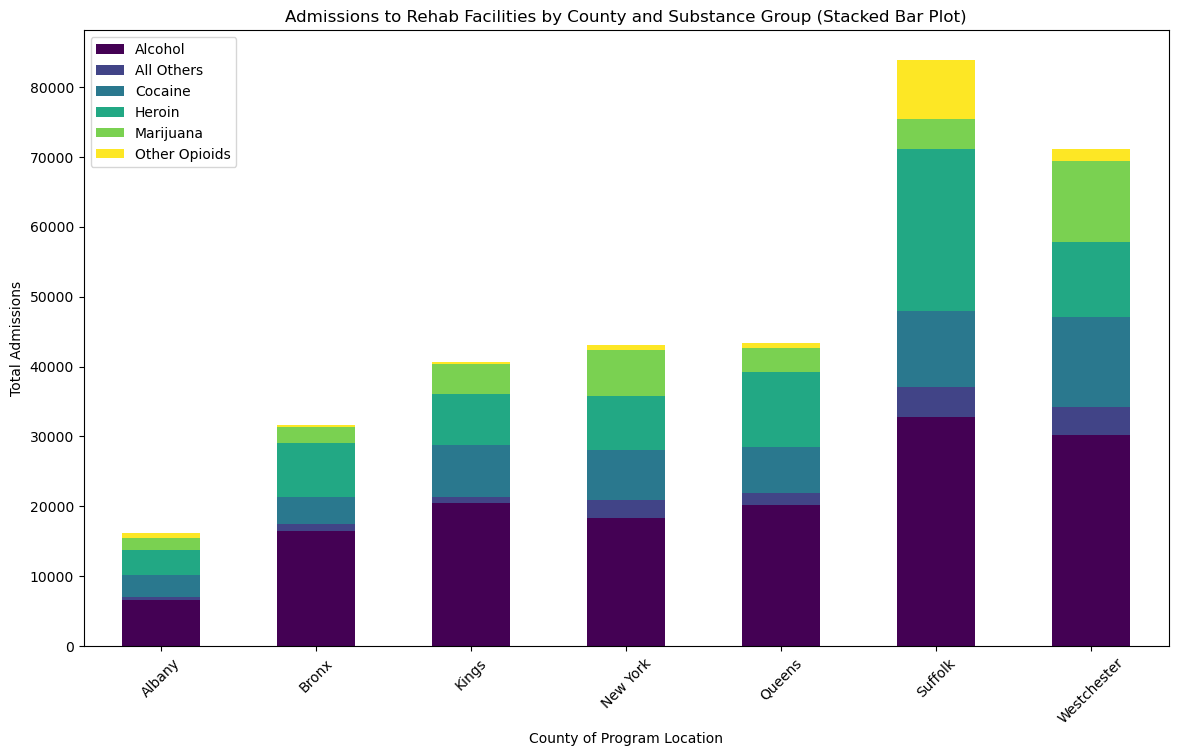

In [283]:
# Create a stacked bar plot
heatmap_data.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Admissions to Rehab Facilities by County and Substance Group (Stacked Bar Plot)')
plt.xlabel('County of Program Location')
plt.ylabel('Total Admissions')
plt.legend()
plt.xticks(rotation=45)
plt.show()

The graph provides a clearer distinction in substance use patterns among the seven counties, showing that alcohol is the most commonly admitted substance in all counties, followed by heroin in second place and cocaine in third. Meanwhile, other opioids have the lowest admissions across all seven counties.

Additionally, Suffolk and Westchester have the highest total substance use admissions compared to the other counties, suggesting that substance use is more prevalent in suburban areas of New York.